<a name="cell-TOC-Estimation"></a> 

2. [Estimation](#cell-samplingIntegration)
  1. [Monte Carlo Integration](#cell-MCint)
      1. [Integral Estimation Accuracy [Central Limit Theorem (CLT)]](#cell-MCint-CLT)
  2. [Improving Estimation Efficiency](#cell-estimationEfficiency)
     1. [Importance Sampling](#cell-estimationEfficiency-ImportanceSampling)
     2. [Antithetic Sampling](#cell-estimationEfficiency-AntitheticSampling)
     3. [Control Variates](#cell-estimationEfficiency-ControlVariates)


<a name="cell-samplingIntegration"></a>

# 2. Estimation ([Return to TOC](#cell-TOC-Estimation))

---

If we are interested in an **expected value**...<br>*we actually are interested in computing an* ***integral***

$$ E_{X\sim f_\theta(x)}[g(x)] = \int g(x)f_\theta(x) dx = \int h(x) dx$$

***Sampling*** can be used in the service of ***estimation*** of an **expected value**

$${\hat \theta \; \text{ estimating }\; E_X[g(x)] \quad \text{ also estimates } \quad \int h(x) dx}$$

> Estimating an expected value ***estimates*** the value of an **integral computation**
> > **Importance sampling** is leveraging this but just using a ***proposal distribution*** instead of the ***target distribution***


<a name="cell-MCint"></a>

## 2.A Monte Carlo Integration ([Return to TOC](#cell-TOC-Estimation))
---

$$\int_a^b \!\!\!\! f(u) du = \int_a^b \!\!\!\! f(u)(b-a) \frac{1}{b-a} du = \int_a^b \!\!\!\! g(u) \frac{1}{b-a} du = E_{U\sim \text{Uniform}(a,b)}[g(U)] \require{cancel}$$


\begin{align*}
\\
\color{black}{\text{So if}}&&\color{black}{Y_i = g(U_i)} & {}\; \color{black}{= f(U_i)(b-a) \quad \text{for} \quad U_i\sim \text{Uniform}(a,b)} \\\\
\color{black}{\text{then}}&& \color{black}{E_U\left[Y_i\right] = E_U\left[g(U_i)\right]} & {}\; \color{black}{= \int_a^b \!\!\!\! f(u) \cancel{(b-a)}\frac{1}{\cancel{(b-a)}} du = \int_a^b \!\!\!\!f(u) du} \\\\
\text{Integral} && \int_a^b \!\!\!\! f(u) du \quad\quad\quad& {} \color{black}{\text{is estimated by} \quad\quad \bar Y_n = \frac{\sum_{i=1}^n Y_i}{n} = \frac{\sum_{i=1}^n g(U_i)}{n} = \frac{\sum_{i=1}^n f(U_i)(b-a)}{n}} 
\end{align*}


## 2.A Monte Carlo Integration 
---
Area of a quarter-circle is $\pi r^2/4$; so, uniformly drop random points in the square,<br>count proporion of "reds", $\require{cancel}\bar Y_n = \frac{\sum_{i=1}^n Y_i{\cancel{(a^1-b^0)^2}}}{n}$, and estimate $\hat \pi = 4 \bar Y_n$ (since $r=1$)


<table>
<tr>
<td>

![](https://enricodegiuli.files.wordpress.com/2017/05/pi_30k.gif?resize=500%2C500)
<!--https://en.wikipedia.org/wiki/Monte_Carlo_method-->
    
</td>
<td>
    
Or set $Y_i = f(U_i)$ to be the quarter circle<br>height over $[0,1]$ and use 
$\bar Y_n = \frac{\sum_{i=1}^n f(U_i)}{n}$
    

```python
import numpy as np
from scipy import stats
    
# r^2 = x^2 + y^2 
# so solving for y...
y = lambda x: np.sqrt(1-x**2)

n = 100000000
u = stats.uniform.rvs(size=n)
    
y(u).mean()*4
# 3.1416167096359295
```

</td>
</tr>
</table>


| 1. Why do we square in the first version with $(a^1-b^0)^2$?|2. Why is the coded version different?|
|-|-|
|$$\color{black}{\int 1_{[\text{circle}]}(u)p(u) du = \int_a^b \int_c^d 1_{[\text{circle}]}(u)\frac{1}{(a-b)(c-d)}du_1du_2}$$|$$\color{black}{\int f(u)p(u) du = \int_0^1 f(u)du}$$|



In [82]:
import numpy as np
from scipy import stats
# r^2 = x^2 + y^2 
# so solving for y...
y = lambda x: np.sqrt(1-x**2)
n = 100000000
u = stats.uniform.rvs(size=n)
y(u).mean()*4

3.141549766399787

<a name="cell-MCint-CLT"></a>

# 2.A.a Integral Estimation Accuracy [How accurate is it?]

---

\begin{align*}
\text{Integration}&\quad{} \displaystyle E[Y_i] = \int_a^b \!\!\!\!f(u) du \quad \text{ is estimated by } \quad \bar Y_n = \frac{\sum_{i=1}^n Y_i}{n}\\
\color{gray}{\text{where}} &\quad{} \color{gray}{Y_i = (b-a)f(U_i) \; \text{ and } \; U_i\sim U(a,b)} \\
\end{align*}

<font style="color:white;">
Using the <u>***central limit theorem (CLT)***</u> for $\bar Y_n$ estimating $E_Y[Y_i]$ then...<br>the accuracy of ***integral estimation*** of $\int_a^b \!\!f(u) du$ depends on the $\bar Y_n$ estimators ***standard error***

$$\bar Y_n \sim N\left(E[Y_i] = \int_a^b \!\!\!\! f(u)  du ,\frac{\text{Var}[Y]}{n} \right)
\quad \text{so } \quad  \frac{\bar Y_n - \int_a^b \!\!f(u) du}{\sqrt{\widehat{\text{Var}[Y]/n}}} \sim t_{n-1}$$</font>

1. <font style="color:white;">So, more Monte Carlo Samples $n$ improve accuracy by CLT</font>
2. <font style="color:white;">But also, the smaller $\text{Var}[Y]$ is the more accurate the estimation will be...</font>



<a name="cell-MCint-CLT"></a>

# 2.A.a Integral Estimation Accuracy [How accurate is it?]

---

\begin{align*}
\text{Integration}&\quad{} \displaystyle E[Y_i] = \int_a^b \!\!\!\!f(u) du \quad \text{ is estimated by } \quad \bar Y_n = \frac{\sum_{i=1}^n Y_i}{n}\\
\color{gray}{\text{where}} &\quad{} \color{gray}{Y_i = (b-a)f(U_i) \; \text{ and } \; U_i\sim U(a,b)} \\
\end{align*}

Using the <u>***central limit theorem (CLT)***</u> for $\bar Y_n$ estimating $E_Y[Y_i]$ then...<br>the accuracy of ***integral estimation*** of $\int_a^b \!\!f(u) du$ depends on the $\bar Y_n$ estimators ***standard error***

$$\bar Y_n \sim N\left(E[Y_i] = \int_a^b \!\!\!\! f(u)  du ,\frac{\text{Var}[Y]}{n} \right)
\quad \text{so } \quad  \frac{\bar Y_n - \int_a^b \!\!f(u) du}{\sqrt{\widehat{\text{Var}[Y]/n}}} \sim t_{n-1}$$

1. So, more Monte Carlo Samples $n$ improve accuracy by CLT
2. But also, the smaller $\text{Var}[Y]$ is the more accurate the estimation will be...




<a name="cell-estimationEfficiency"></a>

## 2.B Improving Estimation Efficiency ([Return to TOC](#cell-TOC-Estimation))
---

What's the area under this curve? That is, the integral of the function over $[0,1]$ ?$\scriptsize \displaystyle \color{white}{ \int_0^1}$<!--${\rm I\!R}^+$?-->


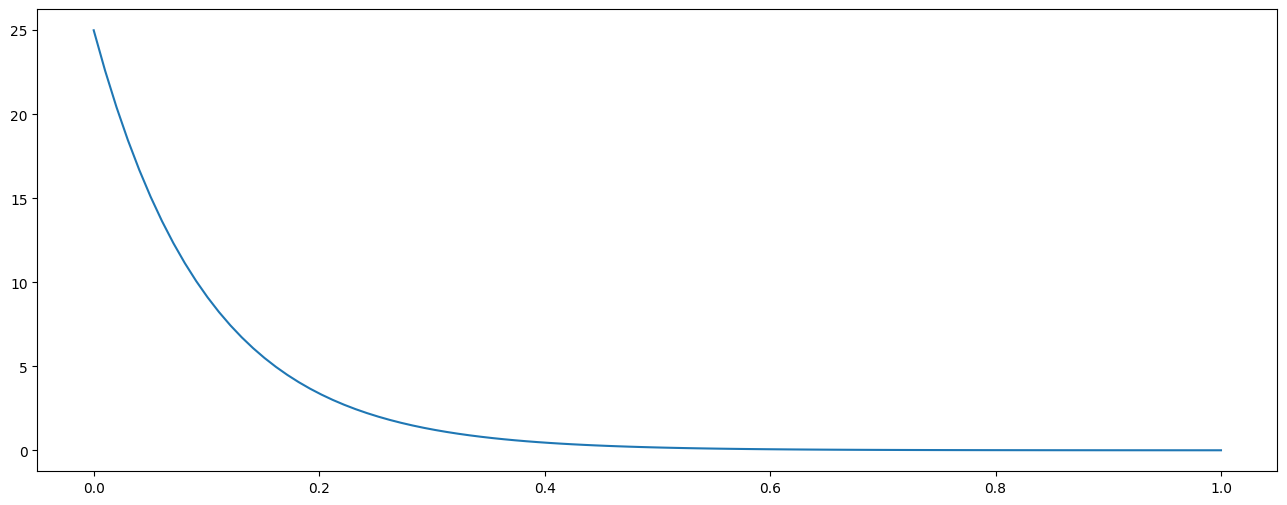

In [25]:
import numpy as np; import matplotlib.pyplot as plt
x=np.linspace(0,1,100); plt.figure(figsize=(16,6)); plt.plot(x, 25*np.exp(-10*x));


## 2.B Improving Estimation Efficiency 

--- 

What's the area under this curve? That is, what is the value of $\scriptsize \displaystyle \int_0^1 25e^{-10u} du$ ?


In [4]:
import numpy as np; from scipy import integrate # Integral Approxiation rather than Estimation...
f = lambda x: 25*np.exp(-10*x) # *** STA410_W24_Week2_Extra_QuadratureIntegralApproximation.ipynb ***
ApproximatedArea,NumericalPrecision = integrate.quad(f, 0, 1); print("Approximated Area", ApproximatedArea, "Numerical Precision", NumericalPrecision)

Approximated Area 2.4998865001755934 Numerical Precision 7.081697859009796e-14


In [5]:
from scipy import stats
n = 1000; u = stats.uniform.rvs(size=n)
ybar,StandardError = f(u).mean(), (f(u).var(ddof=1)/n)**0.5; print("y-bar", ybar, "Standard Error", StandardError)

y-bar 2.5922558557882014 Standard Error 0.16290019651482157


In [6]:
n = 100000000; u = stats.uniform.rvs(size=n)
ybar,StandardError = f(u).mean(), (f(u).var(ddof=1)/n)**0.5; print("y-bar", ybar, "Standard Error", StandardError)

y-bar 2.5003323697278237 Standard Error 0.0005000633063231982



## 2.B Improving Estimation Efficiency 
---

These integrals are equivalent (by [the law](https://math.stackexchange.com/questions/415196/proving-the-law-of-the-unconscious-statistician) of the [unconscious statistician](https://en.wikipedia.org/wiki/Law_of_the_unconscious_statistician)):

$$\scriptsize E_{X\sim \text{uniform}(0, 1)}\left[25e^{-10x}\right] = \int_0^1 5e^{-5x}\times \frac{\int_0^1 5e^{-5x}dx}{\color{blue}{\int_0^1 5e^{-5x}dx}} \color{blue}{\times 5e^{-5x}} dx =  E_{\color{blue}{X\sim \text{truncexpon}(5, 1)}}\left[5e^{-5x}\times \int_0^1 5e^{-5x}dx\right]$$ 


In [24]:
c = stats.expon(scale=1/5).cdf(1)
n = 100000; print(np.var(c*stats.expon(scale=1/5).pdf(stats.truncexpon(5, scale=1/5).rvs(size=n))), end=' '); print("is much less than", end=' ')
print(np.var(stats.expon(scale=1/5).pdf(stats.uniform.rvs(size=n))**2)); 
print("\nThe variance of 'samples' of PDF evaluations when sampling proportionally to the function being evaluated")
print("is much less than the variance of 'samples' of PDF evaluations drawn uniformly over the function support...")

2.031129643857095 is much less than 25.248413226054282

The variance of 'samples' of PDF evaluations when sampling proportionally to the function being evaluated
is much less than the variance of 'samples' of PDF evaluations drawn uniformly over the function support...


- Look at the function again, and how the tail decays very quickly...
- ***Monte Carlo estimation*** averages over mostly $\epsilon$-small values, relative to which large $f(u)$ are both<br>(a) very necessary for accurate estimation while at the same time (b) "more rare tail values"

- Whereas, from the [equivalent] perspective of 'sample' $p(x)$ evaluations from samples from $p(x)$ pdf,<br>
smaller-valued $p(x)$ evalautions are unrepresentative "tail values" that are now only included proportionally
- Proportional sampling focuses on averaging 'samples' having a less variability with $\text{Var}[p(x)] < \text{Var}[f(u)]$


## 2.B Improving Estimation Efficiency 
---

- Sampling is now exactly proportional to the (slightly different) function being evaluated
- This reduces $\sigma_{f(U)}$ rather than increasing $n$ to reduce the **standard error** $\frac{\hat{\sigma}_{f(U)}}{\sqrt{n}}$


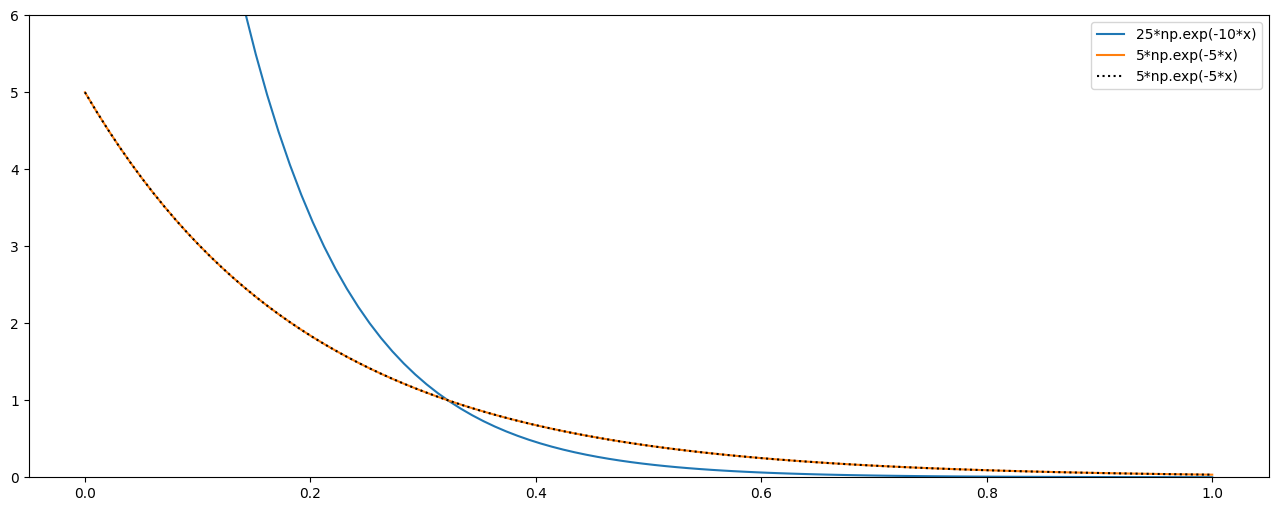

In [9]:
import numpy as np; import matplotlib.pyplot as plt
x=np.linspace(0,1,100); plt.figure(figsize=(16,6)); plt.plot(x, 25*np.exp(-10*x), label='25*np.exp(-10*x)'); plt.plot(x, 5*np.exp(-5*x), label='5*np.exp(-5*x)'); plt.plot(x, 5*np.exp(-5*x), 'k:', label='5*np.exp(-5*x)'); plt.legend(); plt.ylim([0,6]);


## 2.B Improving Estimation Efficiency 
---

- Sampling is now exactly proportional to the (slightly different) function being evaluated
- This reduces $\sigma_{f(U)}$ rather than increasing $n$ to reduce the **standard error** $\frac{\hat{\sigma}_{f(U)}}{\sqrt{n}}$


In [12]:
from scipy import stats
n = 100000000; u = stats.uniform.rvs(size=n)
ybar,StandardError = f(u).mean(), (f(u).var(ddof=1)/n)**0.5; print("y-bar", ybar, "Standard Error", StandardError)

y-bar 2.500524529753715 Standard Error 0.0005000971242282043


In [13]:
n = int(n/10); y = 5*np.exp(-5*stats.truncexpon(5, scale=1/5).rvs(size=n))*stats.expon(scale=1/5).cdf(1)
ybar,StandardError = y.mean(), (y.var(ddof=1)/n)**0.5; print("y-bar", ybar, "Standard Error", StandardError)

y-bar 2.499615177496466 Standard Error 0.00045025834645280214


In [14]:
import numpy as np; from scipy import integrate # Integral Approxiation rather than Estimation...
f = lambda x: 25*np.exp(-10*x) # STA410_W24_Week2_Extra_QuadratureIntegralApproximation.ipynb
ApproximatedArea,NumericalPrecision = integrate.quad(f, 0, 1); print("Approximated Area", ApproximatedArea, "Numerical Precision", NumericalPrecision)

Approximated Area 2.4998865001755934 Numerical Precision 7.081697859009796e-14


## 2.B Improving Estimation Efficiency 
---

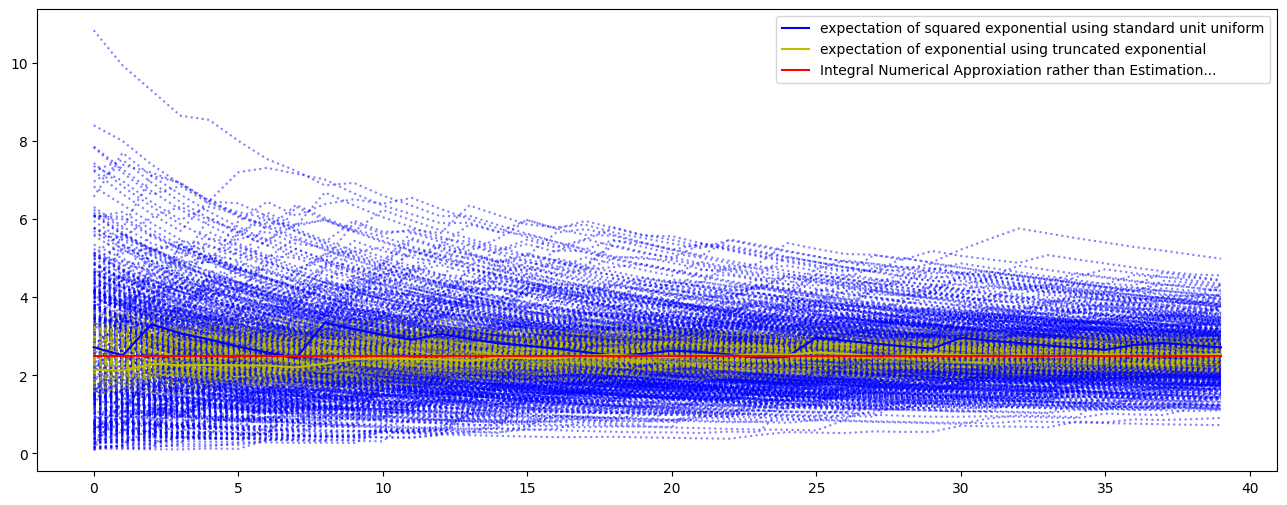

In [16]:
import matplotlib.pyplot as plt; from scipy import stats; import numpy as np; from scipy import integrate
plt.figure(figsize=(16,6)); n = 50
for i in range(500):
    mcint = (stats.expon(scale=1/5).pdf(stats.uniform.rvs(size=n))**2).cumsum()/np.arange(1,n+1); plt.plot(mcint[10:], 'b:', alpha=0.5)
    mcint = (5*np.exp(-5*(stats.truncexpon(5, scale=1/5).rvs(size=n)))*stats.expon(scale=1/5).cdf(1)); mcint = mcint.cumsum()/np.arange(1,n+1); plt.plot(mcint[10:], "y:", alpha=0.5)  
mcint = (stats.expon(scale=1/5).pdf(stats.uniform.rvs(size=n))**2).cumsum()/np.arange(1,n+1); plt.plot(mcint[10:], c='b', label="expectation of squared exponential using standard unit uniform")
mcint = (5*np.exp(-5*(stats.truncexpon(5, scale=1/5).rvs(size=n)))*stats.expon(scale=1/5).cdf(1)); mcint = mcint.cumsum()/np.arange(1,n+1); plt.plot(mcint[10:], c='y', label="expectation of exponential using truncated exponential"); plt.plot((n-10)*[integrate.quad(lambda x: stats.expon(scale=1/5).pdf(x)**2, a=0,b=1)[0]], c='red', label="Integral Numerical Approxiation rather than Estimation..."); plt.legend();

## 2.B Improving Estimation Efficiency 
---
For $X_i \sim p(x_i)$

$$ \hat \theta = \sum_{i=1}^n\frac{g(x_i)}{n} \quad \textbf{ estimates } \quad \theta = \text{E}_{X\sim p}[g(X)] = \int \frac{f(x)}{p(x)}p(x) dx  = \int f(x)dx $$

Notice that if $p(x_i) = f(x_i)/\theta$
 
\begin{align*}
\widehat{\text{Var}}_{X\sim p_X}\left[g(X) \right] =
\frac{1}{n} \sum_{i=1}^n \left( g(x_i) - \text{E}_{X\sim p_X}\left[ g(x_i) \right] \right)^2 &={} 
\frac{1}{n} \sum_{i=1}^n  \left( \frac{f(x_i)}{p(x_i)} - \theta \right)^2 ={} \color{red}{\text{?}}
\end{align*}

<font style="color:white;">suggesting integral estimation is optimal when sampling from $p(x_i) \propto f(x_i) = g(x_i)p(x_i)$</font>

- <font style="color:white;">Of course $p(x_i) \propto g(x_i)p(x_i)$ is not possible for all $x_i$ [except for uniform distributions]</font>
    - <font style="color:white;">but at least we know what we're trying to do here...?</font>
    - <font style="color:white;">we want $X_i \sim p(x_i)$ that more often samples $g(x_i) \approx \theta$ near the true answer(!)</font>
    
<font style="color:white;">To make the point in a silly way... *one single sample* at x = -np.log(2.5/25)/10 solving $2.5 = 25e^{-10x}$<br> gives the right answer: 25*np.exp(-10*x) # 2.5000000000000004</font>


## 2.B Improving Estimation Efficiency 
---
For $X_i \sim p(x_i)$

$$ \hat \theta = \sum_{i=1}^n\frac{g(x_i)}{n} \quad \textbf{ estimates } \quad \theta = \text{E}_{X\sim p}[g(X)] = \int \frac{f(x)}{p(x)}p(x) dx  = \int f(x)dx $$

Notice that if $p(x_i) = f(x_i)/\theta$
 
 \begin{align*}
\widehat{\text{Var}}_{X\sim p_X}\left[g(X) \right] =
\frac{1}{n} \sum_{i=1}^n \left( g(x_i) - \text{E}_{X\sim p_X}\left[ g(x_i) \right] \right)^2 &={} 
\frac{1}{n} \sum_{i=1}^n  \left( \frac{f(x_i)}{p(x_i)} - \theta \right)^2 ={} 0
\end{align*}

suggesting integral estimation is optimal when sampling from $p(x_i) \propto f(x_i) = g(x_i)p(x_i)$ 

- Of course $p(x_i) \propto g(x_i)p(x_i)$ is not possible for all $x_i$ <font style="color:gray;">[except for uniform distributions]</font>
    - but at least we know what we're trying to do here (to make the variance small)... 
    - <font style="color:blue;">we want $X_i \sim p(x_i)$ that more often samples $g(x_i) \approx \theta$ near the true answer(!)</font>
    
<font style="color:green;">To make the point in a silly way... *one single sample* at `x = -np.log(2.5/25)/10` solving $2.5 = 25e^{-10x}$<br> gives the right answer: `25*np.exp(-10*x) # 2.5000000000000004`</font><font style="color:gray;">$\quad\quad$[ahem... [<font style="color:gray;">Gauss Quadrature</font>](https://en.wikipedia.org/wiki/Gaussian_quadrature)]</font>


## 2.B Improving Estimation Efficiency 

---

1. We can't "just sample" $g(x_i)\approx \theta$ because we don't know <font style="color:gray;">(and trying to calculate that is the whole point)</font>

$$\displaystyle \theta = \int \!\!f(x) dx = \int \!\!g(x)p(x) dx = E_{X\sim p(X)}[g(X)]$$

2. ***Monte Carlo integration*** instead (intuitively) averages over (uniformly randomly drawn) function values $f(u_i)\color{gray}{\times(a-b)}$ <font style="color:gray;">(correcting for width)</font>

3. It would be perfectly efficient to instead average  $\quad \overset{\text{but actually that's impossible}}{X_i \sim p(x_i) \propto f(x_i)} =  g(x_i) p(x_i) \quad $ <u>is not possible</u>

4. <font style="color:navy;">So instead we'll sample $\quad X_i \sim p(x_i) \propto |g(x_i)|\quad$</font><font style="color:gray;">(like we did before: less sampling but correct estimation)

- ***Uniform random variables*** (central to both) $\quad\longrightarrow\quad$ ~***Monte Carlo integration***~<br>$\quad\,$</font>(and arbitrary distributional sampling) $\quad\longrightarrow\quad$ ***Inverse CDF sampling***?


- ***Rejection sampling*** clarifies that sampling from a distribution means sampling from its "distributional shape"<br>
but now we see that distributional shape is of interest in its own right for
<font style="color:blue;">computational/estimation efficiency</font>


<a name="cell-estimationEfficiency-ImportanceSampling"></a>

## 2.B.a Importance Sampling ([Return to TOC](#cell-TOC-Estimation))

---

But what happens if the ***natural factorization*** $f(x) = g(x)p(x)$ lends to $p(x)$ **that is not proportional** to $|g(x)|$?

> - Then it would seem **targetted sampling** methods based on ***inverse CDF*** or some other sampling methodology won't help...
>
> So is it game over for more efficient estimation/computation? 

Not quite... Actually, it's quite the opposite...<br>
Writing out the ***importance sampling*** specification 

$$E_{X\sim p(X)}[g(X)] = \int g(x) p(x) dx = \int g(x) \frac{p(x)}{\tilde p(x)} \tilde p(x) dx = E_{X\sim p(\tilde X)}\left[g(X) \frac{p(X)}{\tilde p(X)} \right]$$

$$\text{is estimated by } \quad \frac{1}{n}\sum_{i=1}^n w_i^*g(x_i) \quad \text{ for } \quad w_i^*=\frac{p(x_i)}{\tilde p(x_i)} \quad \text{ for } \quad x_i \sim p_{\tilde X}$$

<font style="color:blue;">and considering an analogous proof (to the "variance is 0" proof)
indicates using the proposal distribution $\tilde p(x) \propto \left|g(x) p(x) \right| = \left|f(x) \right|$</font> <font style="color:gray;">that is proportional to the original integrand function $f(x)$</font><br>


<a name="cell-estimationEfficiency-ImportanceSampling"></a>

## 2.B.a Importance Sampling ([Return to TOC](#cell-TOC-Estimation))

---

But what happens if the ***natural factorization*** $f(x) = g(x)p(x)$ lends to $p(x)$ **that is not proportional** to $|g(x)|$?

> - Then it would seem **targetted sampling** methods based on ***inverse CDF*** or some other sampling methodology won't help...
>
> So is it game over for more efficient estimation/computation? 

Not quite... Actually, it's quite the opposite...<br>
Writing out the ***importance sampling*** specification 

$$E_{X\sim p(X)}[g(X)] = \int g(x) p(x) dx = \int g(x) \frac{p(x)}{\tilde p(x)} \tilde p(x) dx = E_{X\sim p(\tilde X)}\left[g(X) \frac{p(X)}{\tilde p(X)} \right]$$

$$\text{is estimated by } \quad \frac{1}{n}\sum_{i=1}^n w_i^*g(x_i) \quad \text{ for } \quad w_i^*=\frac{p(x_i)}{\tilde p(x_i)} \quad \text{ for } \quad x_i \sim p_{\tilde X}$$

<font style="color:blue;">But if $\tilde p(x) = \frac{1}{\theta} f(x)$ where $\theta = \int f(x) dx$ is the desired area</font><font style="color:red;"> then each
$g(x)\frac{p(x)}{\tilde p(x)} = f(x) \frac{1}{\tilde p(x)} = \theta$</font><font style="color:gray;"> for $X \sim \tilde p(x)$</font><br><font style="color:red;"> *is a perfect estimate and we're just averaging a bunch of perfect estimates...*</font></font><font style="color:gray;"><font style="color:gray;"> so long as $\tilde p(x) \propto \left|g(x) p(x) \right| = \left|f(x) \right|$</font>





## 2.B.a Importance Sampling 
---

$$E_{X\sim p(X)}[g(X)] = \int g(x) p(x) dx = \int g(x) \frac{p(x)}{\tilde p(x)} \tilde p(x) dx = E_{X\sim p(\tilde X)}\left[g(X) \frac{p(X)}{\tilde p(X)} \right]$$

can be estimated using ***importance sampling*** or ***normalized importance sampling*** as either

$$\frac{1}{n}\sum_{i=1}^n w_i^*g(x_i) \overset{or}{\approx} \sum_{i=1}^n w_ig(x_i) \; \text{ with } \; w_i^*=\frac{p(x_i)}{\tilde p(x_i)} \; \text{ or } \; w_i = \frac{w_i^*}{\sum_{i=1}^n w_i^*} \; \text{ for } \; x_i \sim p_{\tilde X}$$
 
<font style="color:gray;">It's easy to show that $E[W_i^*] = 1$ so $\frac{1}{\sum_{i=1}^n w_i^*} \approx \frac{1}{n}$ leading to the ***normalized importance sampling*** approximation</font>


$\displaystyle \text{Var}_{\tilde p(X)}\left[\frac{1}{n} \sum_{i=1}^n W_i^*g(X_i) \right] \;\;\; \begin{array}{c}\text{estimated}\\\text{as}\end{array} \;\;\; \frac{1}{n}\sum_{i=1}^{n}\frac{1}{n-1}\left(w_i^*g(x_i) - \frac{1}{n}\sum_{i=1}^n w_i^*g(x_i) \right)^2$


$\displaystyle \text{Var}_{\tilde p(X)}\left[ \sum_{i=1}^n W_ig(X_i) \right] \quad \begin{array}{c}\text{estimated by the}\\\text{delta method as}\end{array} \quad \sum_{i=1}^{n}w_{i}^{2}\left(g(x_i) - \sum_{i=1}^n w_ig(x_i) \right)^2$


## 2.B.a Importance Sampling 
---

***Importance sampling*** and ***normalized importance sampling***  estimation of

$$\scriptsize E_{X\sim p(X)}[g(X)] = \int g(x) \frac{p(x)}{\tilde p(x)} \tilde p(x) dx \quad \text{ with } \quad \frac{1}{n}\sum_{i=1}^n \underset{w_i^*=p(x)/\tilde p(x)}{w_i^*g(x_i)\;\;} \overset{or}{\approx} \sum_{i=1}^n \underset{w_i = w_i^*/\sum_{i=1}^n w_i^*}{{w_i}g(x_i)\quad\;\;}$$

can pragmatically and effectively reduce sampling variance by choosing $\tilde p(x)$ which

1. has heavier tails than $p(x)$ so ***importance weights*** don't explode $\left(\require{cancel}w_i^* = \frac{p(x_i)}{\tilde p(x_i)}\cancel{>>}0\right)$<br><font style="color:Gray;">[and subsequently cause ***normalized importance weights*** to vanish $w_j\approx 0$]</font>

2. does not sample $x$ where $f(x)\approx 0$ <font style="color:Gray;">($g(x)\approx 0$ or  $w_i^* \approx 0$)</font> or $w_i \approx 0$ (due to some $w_j^*>>0$)

**so the range of evalutions of $\left(g(x) \frac{p(x)}{\tilde p(x)} \right)$ <span style="color:Gray;">and $w_i^* g(x_i)$ and $w_i g(x_i)$</span> 'samples' is restricted to reduce their variance by (1) bounding them from above and (2) bounding them above $0$.**


<font style="color:blue;">Sampling from $\tilde p(x) \propto |f(x)|$ intentionally oversamples the regions of $f(x)=g(x)p(x)$ contributing the most to the integral so the most important regions are better sampled and estimated; then, evaluations are adjusted by $\frac{1}{\tilde p(x)}$ to correct this oversampling and maintain the desired expected value</font> (aka ***importance weighting*** of $g(x_i)$ with $\frac{p(x_i)}{\tilde p(x_i)}$) 

## 2.B.a Importance Sampling 

---

The ***normalized importance sampling*** estimator $ \sum_{i=1}^n w_ig(x_i)$ can be viewed as<br>a "sum of areas" approximation to the $\;\;E_{X\sim p(X)}[g(X)] = \int g(x) \frac{p(x)}{\tilde p(x)} \tilde p(x) dx \;\;$ **integral**. 

- It costs "one addition step" to 
    - add an area to the summation that relevantly contributes to the integral<br>(because it's a non-negligable area)
- <font style="color:Gray;">It also costs "one addition step" to pointlessly</font>
    - <font style="color:Gray;">add an area to the summation that's irrelevant for the integral with area $\approx 0$</font>
    
Clearly adding evaluations where $w_ig(x_i)\approx 0$ into the summation is a waste...

And there's also argument in favor of homogenous weights based on the ***effective sample size*** calculation<br><font style="color:blue;">requires *a priori* **known** weights, which is not actually true for ***importance sampling***... weights are *random variables*...</font>

$$n_{\text{eff}} = \frac{\left(\sum_{i=1}^n w_i\right)^2}{\sum_{i=1}^n w_i^2} = \frac{1}{\sum_{i=1}^n w_i^2} \quad \text{which is maximized at $n$ when $w_i=\frac{1}{n}$ for all $i$}$$

as derived from equating average and weighted average variance calculations $\frac{1}{n^2} \sum_{i=1}^n \sigma^2 = \sum_{i=1}^n w_i^2\sigma^2$

## 2.B.a Importance Sampling 

---

If the integral of interest ***diverges*** so $\int f(x) dx = \infty$ then obviously ***importance sampling*** is not going to help you...<br>
*there's nothing here to estimate...*

If the integral ***converges***, why don't we just conceptualize this who exercise as $\int f(x) \frac{1}{\tilde p(x)} \tilde p(x) dx$ to start with?<br>
Why do we mess with $p(x)$ in $f(x)=g(x)p(x)$ and use $\frac{p(x)}{\tilde p(x)}$? Is this ***natural factorization*** "*important*"?

Well yes, sort of...
<br>
Even though $\displaystyle \scriptsize \quad \frac{1}{n}\sum_{i=1}^n \underset{w_i^*=p(x)/\tilde p(x)}{w_i^*g(x_i)\;\;} = \frac{1}{n}\sum_{i=1}^n \frac{1}{\tilde p(x_i)} f(x_i) \quad$ $\frac{1}{\tilde p(x_i)}$ are not natural "weights" which sum to $n$...

It's easy to see that $E\left[\frac{1}{\tilde p(X)}\right]$ is either $(b-a)$ for finite integral limits or $\infty$ for infinite limits $\quad \color{gray}{\int^{b?}_{a?} \frac{1}{\tilde p(X)} \tilde p(X) dx}$
<br>
which means that $\sum_{i=1}^n \frac{1}{\tilde p(x_i)} \neq \frac{1}{n}$ so we can't normalize the "weights" $\frac{1}{\tilde p(x_i)}$ by dividing them by their sum...

> $\frac{\frac{1}{\tilde p(x_i)}}{\sum_{i=1}^n \frac{1}{\tilde p(x_i)}}$ are not ***normalized importance weights*** <font style="color:Gray;">$\quad \frac{\frac{1}{\tilde p(x_i)}}{n}$ are</font>

So we use $p(x)$ from the ***natural factorization*** $f(x)=g(x)p(x)$ so that we 
inevitably define the analysis in terms of ***importance weights*** $\frac{p(x_i)}{\tilde p(x_i)}$ whose 
ituitive ***normalization*** produces functioning ***normalized importance weights***

## 2.B.a Importance Sampling 

---

When estimating the integral using ***importance sampling***

$$\int g(x) p(x) dx = \int g(x) \frac{p(x)}{\tilde p(x)} \tilde p(x) dx \quad\Longleftrightarrow\quad E_{p(x)}[g(x)] = E_{\tilde p(x)}\left[g(x) \frac{p(x)}{\tilde p(x)} \right]$$

the prescribed estimator is actually

$$\scriptsize \overline{W^* Y} =  \underbrace{\frac{\sum_{i=1}^n W_i^* Y_i}{n}}_{E_{\tilde p(x)}[W_i^*]=1} \quad \text{ as opposed to } \quad \overline{Y} = \underbrace{\sum_{i=1}^n W_i Y_i}_{E_{\tilde p(x)}[W_i]=\frac{1}{n}} \quad \text{where } \quad Y_i = g(\tilde X_i) \quad \tilde X_i \sim \tilde p(x) \quad  W_i^* = \frac{p(\tilde X_i)}{\tilde p(\tilde X_i)} \quad W_i = \frac{ W_i^*}{\sum_{i=1}^n  W_i^*}$$

$ \text{because } \scriptsize \displaystyle E[\overline{W^* Y}] =  E_{p(x)}[g(x)] \quad \text{ but } \quad E[\overline{Y}] = E[\overline{W^* Y}] \left(1 + \frac{1}{n}Var(W_i^*)\right) - \frac{1}{n}Cov(W_i^*Y_i, W_i^*) + \mathcal{O}(n^{-2})$

although the bias can be estimated (and adjusted) with $\widehat{\text{Var}}(W_i^*)$ and $\widehat{\text{Cov}}(W_i^*Y_i, W_i^*)$ (it can be shown that) 

$$ \textbf{mean squared error } \scriptsize \text{E}[(\overline{Y} - \text{E}[\overline{Y}])^2] = \text{Var}(\overline{Y}) + \text{bias}[\overline{Y}]^2 <  MSE(\overline{W^* Y}) \quad \quad \text{ if } \quad \text{Cor}(W_i^*Y_i, W_i^*) > \frac{\text{cv}(W^*_i)}{2\text{cv}(Y_i)}$$

where, e.g., $\text{cv}(Y_i) = \frac{\sigma_{Y_i}}{\mu_{Y_i}}$ is the ***coefficient of variation***.

## 2.B.a Importance Sampling 
---

For a posterior distribution $p(\theta|\mathbf{x}) = \text{Beta}(2,2)$, the posterior probability

$$\Pr(0.4 < \theta < 0.6 | \mathbf{x}) = E_{\theta|\mathbf{x}}[1_{[0.4,0.6]}(\theta)] = \int 1_{[0.4, 0.6]}(\theta) p(\theta|\mathbf{x}) d\theta = \int g(\theta)p(\theta|\mathbf{x}) d\theta = \int f(\theta) d\theta $$

will not be most efficiently calculated by naively basing estimation on samples from $p(\theta|\mathbf{x}) = \text{Beta}(2,2)$.<br>Instead, ***importance sampling*** can bias sampling for more efficient integral estimation using $\tilde p(x) \propto |f(\theta)|$ such that $\text{Var}_{\tilde p(\theta)}\left[g(\theta) \frac{p(\theta|\mathbf{x})}{\tilde p(\theta)}\right] < \text{Var}_{p(\theta)}\left[g(\theta)\right]$.

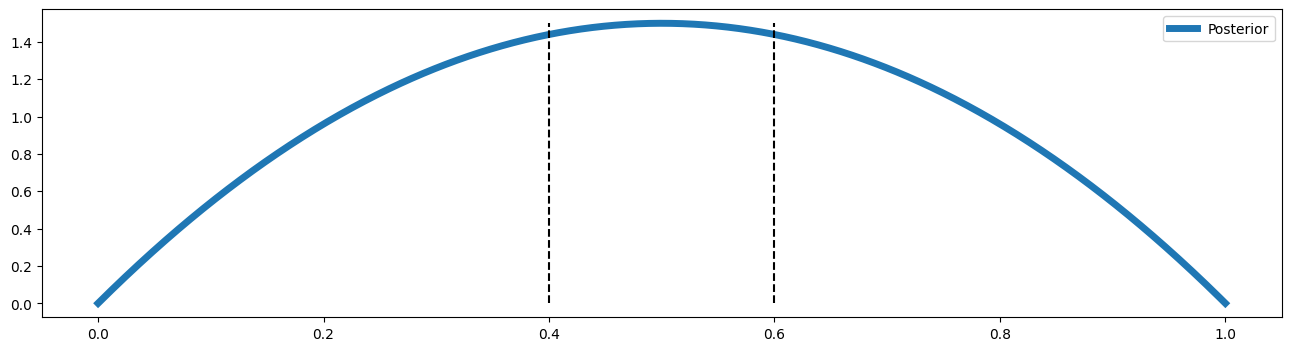

In [70]:
import matplotlib.pyplot as plt; from scipy import stats; import numpy as np
left,right=.4,.6; p_thetaGx = stats.beta(2,2)
def region(x, l=left,r=right): return (x>l)&(x<r)
support = np.linspace(0,1,1000); plt.figure(figsize=(16,4)); plt.plot(support, p_thetaGx.pdf(support), label="Posterior" , linewidth=5); plt.vlines([left,right], ymin=0, ymax=p_thetaGx.pdf(support).max(), color='k', linestyle='dashed'); plt.legend();

## 2.B.a Importance Sampling 
---

***Importance sampling*** allows for oversampling of $f(\theta) = g(\theta) p(\theta|\mathbf{x})$ where it dominates $\int g(\theta) \frac{p(\theta|\mathbf{x})}{\tilde p(\theta)} \tilde p(\theta) dx$ so the function is more precisely represented in its most relevant areas, but subsequantly appropriately downweighted for oversampling by $\frac{1}{\tilde p(\theta)}$ to keep the correct expected value <font style="color:navy;">(aka ***importance weighting*** of $g(\theta_i)$ with $\frac{p(\theta_i|\mathbf{x})}{\tilde p(\theta_i)}, \theta_i \sim  \tilde p(\theta)$)</font>

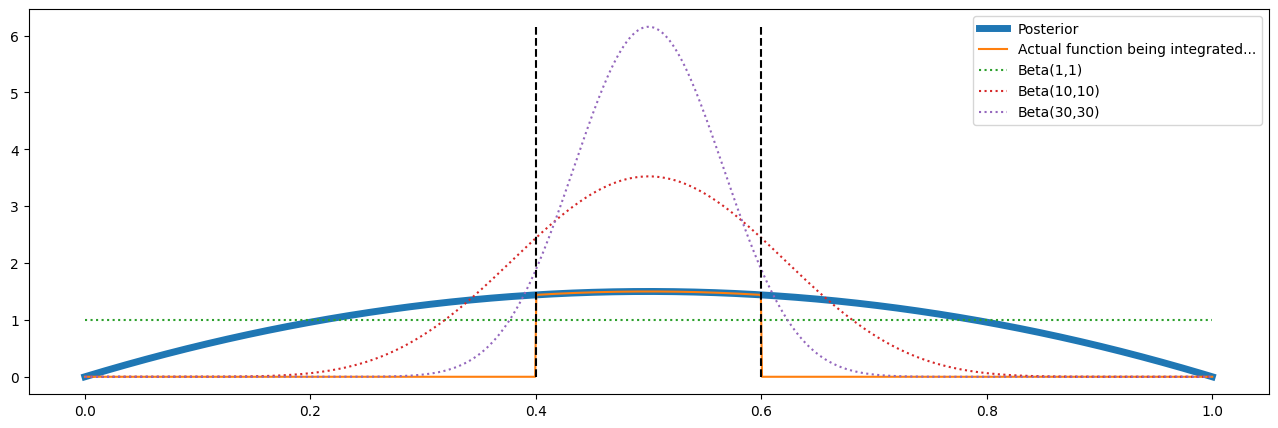

In [97]:
import matplotlib.pyplot as plt; from scipy import stats; import numpy as np
left,right=.4,.6; p_thetaGx = stats.beta(2,2)
def region(x, l=left,r=right): return (x>l)&(x<r)
support = np.linspace(0,1,1000); plt.figure(figsize=(16,5)); 
plt.plot(support, p_thetaGx.pdf(support), label="Posterior" , linewidth=5); plt.plot(support, p_thetaGx.pdf(support)*region(support), label="Actual function being integrated..."); 
for a_,b_ in [(1,1),(10,10),(30,30)]: plt.plot(support, stats.beta(a_,b_).pdf(support), label="Beta("+str(a_)+","+str(b_)+")", linestyle=':');
plt.vlines([left,right], ymin=0, ymax=stats.beta(a_,b_).pdf(support).max(), color='k', linestyle='dashed'); plt.legend();

## 2.B.a Importance Sampling 

---

More efficient estimation of $\scriptsize \Pr(0.4 < \theta < 0.6 | \mathbf{x}) = E_{\theta|\mathbf{x}}[1_{[0.4,0.6]}(\theta)] = \int 1_{[0.4, 0.6]}(\theta) p(\theta|\mathbf{x}) d\theta$<br>by targetted oversampling based on ***importance sampling***.


       The Analytical Truth is: 0.296
       Monte Carlo Integration: 0.26791 (SE: 0.01802)
       Naive Beta(2,2) Samples: 0.306   (SE: 0.01457)
           Importance Sampling: 0.3019 (SE: 0.01241)
Normalized Importance Sampling: 0.30491 (SE: 0.01418) n_eff = 1/(w**2).sum()      = 898.731704838343
Normalize w_/n not w_/w_.sum(): 0.3019 (SE: 0.01402) n_eff = 1/((w_/n)**2).sum() = 916.7315831639128


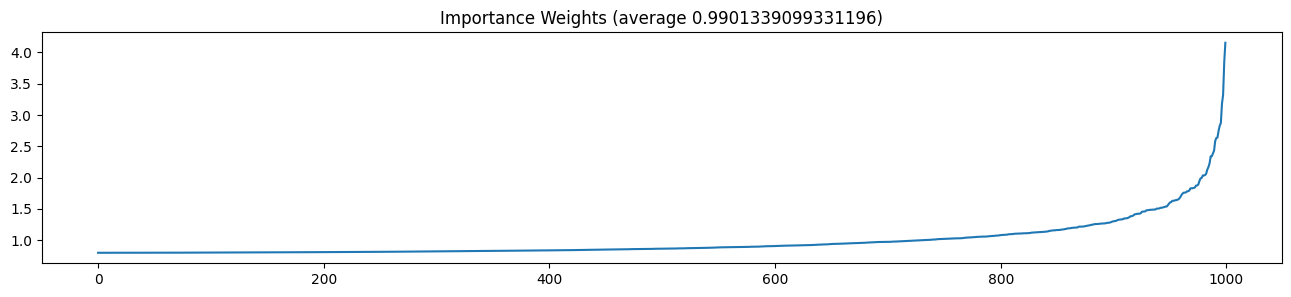

In [111]:
X = stats.beta(2,2); tilde_X = stats.beta(3,3); n = 1000; #tilde_X = stats.uniform(.4,.2); tilde_X = my_pdf()
tilde_x = tilde_X.rvs(size=n); w_ = X.pdf(tilde_x)/tilde_X.pdf(tilde_x); w = w_/w_.sum(); 
plt.figure(figsize=(16,3)); plt.plot(sorted(w_)); plt.title("Importance Weights (average "+str(w_.mean())+")");
print("       The Analytical Truth is:", np.round(X.cdf(right)-X.cdf(left), 5)); u=stats.uniform.rvs(size=n); x=X.rvs(size=n); 
print("       Monte Carlo Integration:", np.round(np.mean(X.pdf(u)*region(u)),5), end=''); print(" (SE:", np.round((np.var(X.pdf(u)*region(u))/n)**0.5, 5), end=')\n')
print("       Naive Beta(2,2) Samples:", np.mean(region(x)), end=' '); print("  (SE:", np.round((np.var(region(x))/n)**0.5, 5), end=')\n')
print("           Importance Sampling:", np.round(np.mean(region(tilde_x)*w_),5), end=' '); print("(SE:", np.round((np.var(region(tilde_x)*w_)/n)**0.5, 5), end=')\n'),
print("Normalized Importance Sampling:", np.round((w*region(tilde_x)).sum(),5), end=' '); print("(SE:", np.round( (((w*(region(tilde_x)-(w*region(tilde_x)).sum()))**2).sum())**0.5, 5), end=") n_eff = 1/(w**2).sum()      = "+str(1/(w**2).sum())+"\n")
# NOT (np.var(region(tilde_x))*(w**2).sum())**0.5 as in https://en.wikipedia.org/wiki/Weighted_arithmetic_mean # mean_wy, mean_w = np.mean(w_*region(tilde_x)), np.mean(w_); var_wy, cov_wy_w, cov_wy_w, var_w_ = np.cov(w_*region(tilde_x), w_).flatten(); 
# -> sum_i g(x_i)*(w_i/sum(w_)) is a ratio of random variables: https://artowen.su.domains/mc/Ch-var-is.pdf    # or np.sqrt((var_wy + 0.296**2 *var_w_ - 2*0.296*cov_wy_w)/n) p 182 givens/hoeting
print("Normalize w_/n not w_/w_.sum():", np.round((w_/n*region(tilde_x)).sum(),5), end=' '); print("(SE:", np.round( (((w_/n*(region(tilde_x)-(w_/n*region(tilde_x)).sum()))**2).sum())**0.5, 5), end=") n_eff = 1/((w_/n)**2).sum() = "+str(1/((w_/n)**2).sum())+"\n")

In [105]:
class my_pdf(stats.rv_continuous):
    def pdf(self,x):
        return .9/.2*(x>.4)*(x<.6) + .05/.4*(x<=.4) + .05/.4*(x>=.6)
    def rvs(self,size):
        u = stats.uniform().rvs(size)
        l = u < 0.05
        r = (u >= 0.05) & (u < 0.1)
        output = stats.uniform(0.4,0.2).rvs(size)
        output[l] = stats.uniform(0,0.4).rvs(size)[l]
        output[r] = stats.uniform(0.6, 0.4).rvs(size)[r]
        return output

<a name="cell-estimationEfficiency-AntitheticSampling"></a>

## 2.B.b Antithetic Sampling  ([Return to TOC](#cell-TOC-Estimation))

---

Efficient integral estimation with ***importance sampling*** biases evaluations to the most relevant regions of the $f(x)$ integrand by sampling from $\tilde p(x) \propto f(x)$ (and ***importance weight*** correcting the bias to maintain the expected value) 

- $$\text{This is better than} \int f(x) dx = \int [f(x)]^{\frac{1}{2}}[f(x)]^{\frac{1}{2}} dx = \int p(x)p(x) \text{ only sampling } \tilde p(x) \propto [f(x)]^{\frac{1}{2}}$$


But we can do better yet...<br>How about leveraging available correlations present in collections of estimators?

Suppose estimator $\bar x_1$ and $\bar x_2$ have $E[\bar x_1] = E[\bar x_2] = \theta$ and correlation $\rho = \frac{Cov(\bar x_1,\bar x_2)}{\sigma_{\bar x_1}\sigma_{\bar x_2}}$. 

If (for simplicity) $\sigma_{\bar x_1}^2=\sigma_{\bar x_2}^2=\frac{\sigma^2}{n}$ then 


$$
\begin{align*}
\text{Var}\left(\frac{\bar x_1+\bar x_2}{2}\right) = {} & \frac{\text{Var}(\bar x_1)+\text{Var}(\bar x_2)}{4} + \frac{2\text{Cov}(\bar x_1, \bar x_2)}{4} \\
= {} & \frac{\sigma^2}{2n} + \frac{\frac{\sigma}{\sqrt{n}}\frac{\sigma}{\sqrt{n}}\rho}{2} = \frac{(1+\rho)\sigma^2}{2n}
\end{align*}$$



## 2.B.b Antithetic Sampling 

---

If $\rho<0$ then 
$\text{Var}\left(\frac{\bar x_1+\bar x_2}{2}\right) = \frac{(1+\rho)\sigma^2}{2n}$
is less than $\text{Var}(\bar x_1)$ and $\text{Var}(\bar x_2)$.

Achieving $\rho<0$ (and potentially a substantially lower estimation variance) can be easy... 

- $\rho_{\bar x_1,\bar x_2} < 0 \text{ if } x_{2i} = -x_{1i} \text{ for } x_{1i}\sim N(\mu, \sigma^2)$
- $\rho_{\bar x_1,\bar x_2} < 0 \text{ if } x_{2i} = 1-x_{1i} \text{ for } x_{1i}\sim U(0,1)$

***Antithetic sampling*** is similar to ***Bagging*** in ***Random Forests*** where for tree-based precictions $t_k, j=1,\cdots, K$ with common variance $\sigma^2_{t}$ and shared correlation $\rho = \frac{Cov(t_k,t_{k'})}{\sigma^2_{t}}$

$$
Var(\bar t) = \frac{1}{K^2} \sum_{k=1}^K \sigma^2_t + \frac{2}{K^2} \sum_{k,k'} \sigma_t^2 \rho = \frac{\sigma^2}{K} + \frac{\frac{2}{2}(K^2-K)\sigma_t^2\rho}{K^2}
 = \rho \sigma^2 + \frac{(1-\rho)\sigma^2}{K}
$$

where gains from averaging for even positively correlated estimators will be beneficial.

<!-- = \frac{\sigma^2}{K} + \sigma_t^2\rho - \frac{\sigma_t^2\rho}{K} -->

### 2.B.b Antithetic Sampling 

---

Here we combine add ***antithetic sampling*** and ***importance sampling*** to a slight variant on our previous problem

$$\Pr(0.4 < \theta < 0.6 | \mathbf{x}) = E_{\theta|\mathbf{x}}[1_{[0.4,0.6]}(\theta)] = \int 1_{[0.4, 0.6]}(\theta) p(\theta|\mathbf{x}) d\theta$$


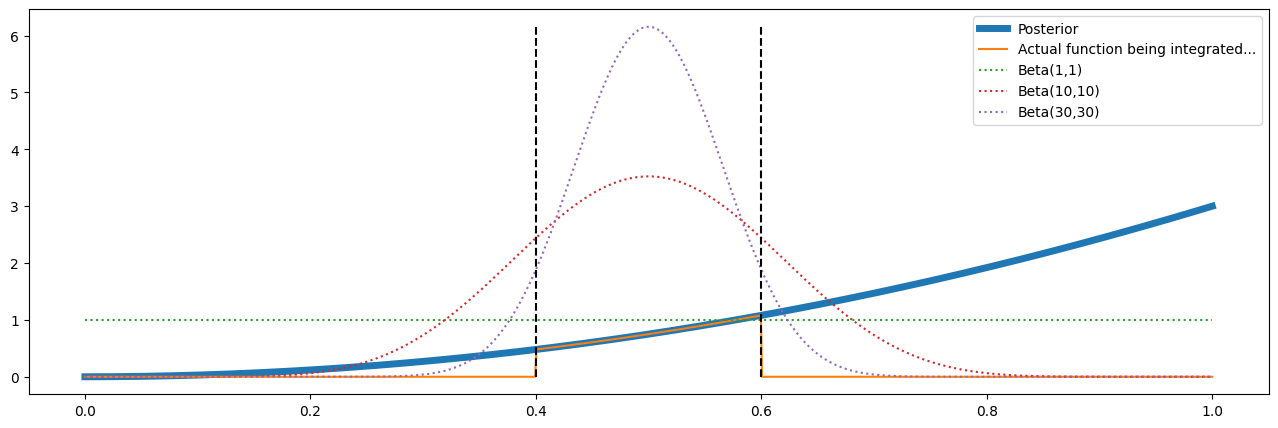

In [96]:
# tilde_X.pdf(tilde_x)=tilde_X.pdf(1-tilde_x) but now X.pdf(tilde_x) != X.pdf(1-tilde_x); otherwise, estimates are equivalent (and this does nothing!)
import matplotlib.pyplot as plt; from scipy import stats; import numpy as np
left,right=.4,.6; p_thetaGx = stats.beta(3,1)
def region(x, l=left,r=right): return (x>l)&(x<r)
support = np.linspace(0,1,1000); plt.figure(figsize=(16,5)); 
plt.plot(support, p_thetaGx.pdf(support), label="Posterior" , linewidth=5); plt.plot(support, p_thetaGx.pdf(support)*region(support), label="Actual function being integrated..."); 
for a_,b_ in [(1,1),(10,10),(30,30)]: plt.plot(support, stats.beta(a_,b_).pdf(support), label="Beta("+str(a_)+","+str(b_)+")", linestyle=':');
plt.vlines([left,right], ymin=0, ymax=stats.beta(a_,b_).pdf(support).max(), color='k', linestyle='dashed'); plt.legend();

### 2.B.b Antithetic Sampling 

---

Here we combine add ***antithetic sampling*** and ***importance sampling*** to our previous problem

$$\Pr(0.4 < \theta < 0.6 | \mathbf{x}) = E_{\theta|\mathbf{x}}[1_{[0.4,0.6]}(\theta)] = \int 1_{[0.4, 0.6]}(\theta) p(\theta|\mathbf{x}) d\theta$$

***Antithetic sampling*** can do more than just "double" the samples, *if the estimators are negatively correlated...*

       The Analytical Truth is: 0.152
       Monte Carlo Integration: 0.14853 (SE: 0.00977)
       Naive Beta(2,2) Samples: 0.155   (SE: 0.01144)
           Importance Sampling: 0.15122 (SE: 0.00109 -> 0.00077 with sqrt 2 factor)
       + Antithetical Sampling: 0.15199 (SE: 5e-05)


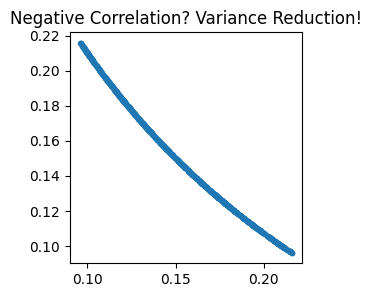

In [80]:
from scipy import stats; import numpy as np; X = stats.beta(3,1); tilde_X = stats.beta(10, 10); tilde_X = stats.uniform(.4,.2); 
n = 1000; tilde_x = tilde_X.rvs(size=n); w_ = X.pdf(tilde_x)/tilde_X.pdf(tilde_x); print("       The Analytical Truth is:", np.round(X.cdf(right)-X.cdf(left), 5)); u=stats.uniform.rvs(size=n); x=X.rvs(size=n); print("       Monte Carlo Integration:", np.round(np.mean(X.pdf(u)*region(u)),5), end=''); print(" (SE:", np.round((np.var(X.pdf(u)*region(u))/n)**0.5, 5), end=')\n'); print("       Naive Beta(3,1) Samples:", np.mean(region(x)), end=' '); print("  (SE:", np.round((np.var(region(x))/n)**0.5, 5), end=')\n')
print("           Importance Sampling:", np.round(np.mean(region(tilde_x)*w_),5), end=' '); print("(SE:", np.round((np.var(region(tilde_x)*w_)/n)**0.5, 5), end=' -> '); print(np.round(((np.var(region(tilde_x)*w_)/n)**0.5)/np.sqrt(2), 5)," with sqrt 2 factor)", sep='')
print("       + Antithetical Sampling:", end=" "); tilde_x_1 = w_*region(tilde_x); tilde_x_2 = X.pdf(1-tilde_x)/tilde_X.pdf(1-tilde_x) * region(1-tilde_x) 
print(np.round(0.5*(tilde_x_1.mean()+tilde_x_2.mean()),5), end=' ') # Here's one way to estimate the variance of the Antithetical Sampling estimate https://stats.stackexchange.com/questions/163583/covariance-of-two-sample-means
tilde_xs_var = 0.25*(np.var(tilde_x_1)/n + np.var(tilde_x_2)/n + (2/n)*np.cov(tilde_x_1, tilde_x_2)[0,1]); print("(SE:", np.round(tilde_xs_var**0.5, 5), end=')\n'); plt.figure(figsize=(3,3)); plt.plot(tilde_x_1,tilde_x_2,'.'); plt.title('Negative Correlation? Variance Reduction!');

<a name="cell-estimationEfficiency-ControlVariates"></a>

### 2.B.c Control Variates ([Return to TOC](#cell-TOC-Estimation))

---

So far we've seen biasing sampling towards more informative evaluations and leveraging correlated estimators to reduce estimation variance and hence lower computational demand. 

Taking this further, we can even leverage correlated estimators that aren't even estimating the same thing...

$$E[\hat \theta] = \theta  \not = \lambda = E[\hat \lambda] \quad \text{ so long as } \quad \lambda \text{ and } Cov(\hat \theta, \hat \lambda) \text{ are known}$$

since if $Cov(\hat \theta, \hat \lambda)>0$, then $\hat \lambda > \lambda$ suggests $\hat \theta > \theta$ (and $\hat \lambda < \lambda$ suggests $\hat \theta < \theta$), etc...

Under such conditions, the estimator $\quad \hat \theta + \underset{- \text{ when } \hat \lambda > \lambda}{\overset{+ \text{ when } \hat \lambda > \lambda}{\beta (\hat \lambda-\lambda)}} \quad$ of $\theta$ can be used<br>with $\beta(<0)$ chosen to optimally reduced variance as shown on the next slide.


### 2.B.c Control Variates ([Return to TOC](#cell-TOC-Estimation))

---

\begin{align*}
\text{Var}\left(\hat \theta + \beta (\hat \lambda-\lambda)\right) ={} & \overbrace{\text{Var}\left(\hat \theta \right) + \beta^2 \text{Var} (\hat \lambda) + 2 \beta \text{Cov}\left(\hat \theta, \hat \lambda \right)}^{\frac{\partial}{\partial \beta} Var\left(\hat \theta + \beta (\hat \lambda-\lambda)\right) \,=\, 0 \; \Rightarrow \; 2\beta \text{Var}(\hat \lambda ) +2 \text{Cov}(\hat \theta, \hat \lambda) \,=\,0} \\
= {} & \; \text{Var}\left(\hat \theta \right) + \left(-\frac{\text{Cov}(\hat \theta, \hat \lambda)}{\text{Var}\left(\hat \lambda \right)}\right)^2 Var\left(\hat \lambda \right) - 2\frac{\text{Cov}(\hat \theta, \hat \lambda)}{\text{Var}\left(\hat \lambda \right)}\text{Cov}(\hat \theta, \hat \lambda) \\
= {} & \;  \text{Var}\left(\hat \theta \right) - \frac{\left(\text{Cov}(\hat \theta, \hat \lambda)\right)^2}{\text{Var}\left(\hat \lambda \right)} < \text{Var}\left(\hat \theta \right)
\end{align*}

with $\beta = - \frac{\widehat{\text{Cov}}[\hat \theta, \hat \lambda]}{\widehat{\text{Var}}[\hat \lambda]}$ found by solving to minimize variance for the $\hat \theta + \beta (\hat \lambda-\lambda)$ estimator.

---

When many auxiliary estimators are available, many ***control variates*** can be used simultaneously as a sort of "multiple linear regression" of the form $\hat \theta + \sum_{k=0}^K \beta (\hat \lambda_k-\lambda_k)$




### 2.B.c Control Variates 

---

For ***importance sampling***, $E[W_i^*] = 1$ so a ***control variate*** estimator can be constructed as 
$\overline{W^*Y} + \beta (\overline{W^*}-1)$ adding a bias of $\mathcal{O}(\frac{1}{n})$; but outperforming $\overline{W^*Y}$ MSE for large $n$.

In [119]:
# getting expected value of a beta(3,1) posterior to demonstrate this
# w* = X.pdf(tilde_x)/tilde_X.pdf(tilde_x) * 1_[a,b](tilde_x) if working with an indicator and sampling in just that region
# means bar-w* = bar-w*y... so it's just an identical estimator... not a control variate in that case!
from scipy import stats; import numpy as np; X = stats.beta(3,1); tilde_X = stats.beta(5, 1); #stats.beta(4, 1); is exact!
n = 1000; tilde_x = tilde_X.rvs(size=n); w_ = X.pdf(tilde_x)/tilde_X.pdf(tilde_x); print("The Analytical Truth is:", np.round(X.mean(), 5)); u=stats.uniform.rvs(size=n); x=X.rvs(size=n); print("Monte Carlo Integration:", np.round(np.mean(X.pdf(u)*(u)),5), end=''); print(" (SE:", np.round((np.var(X.pdf(u)*(u))/n)**0.5, 5), end=')\n'); print("Naive Beta(3,1) Samples:", np.round(np.mean((x)),5), end=''); print(" (SE:", np.round((np.var((x))/n)**0.5, 5), end=')\n')
print("    Importance Sampling:", np.round(np.mean(tilde_x*w_),5), end=' '); print("(SE:", np.round((np.var((tilde_x)*w_)/n)**0.5, 5), end=')\n'); 

beta = -np.cov(w_*region(tilde_x), w_, ddof=1)[0,1]/np.var(w_, ddof=1); 
print("     + Control Variates:", end=' '); print(np.round((w_*(tilde_x)).mean() + (w_.mean()-1)*beta,5), end=' ') 
tilde_cv_var = np.var(w_*(tilde_x), ddof=1) + beta**2*np.var(1-w_, ddof=1) + \
               2*beta*np.cov(w_*(tilde_x), w_, ddof=1)[0,1] # = np.var(w*region(tilde_x), ddof=1) - np.cov(w*region(tilde_x), w, ddof=1)[0,1]**2/np.var(w, ddof=1)
print("(SE:", np.round((tilde_cv_var/n)**0.5, 5), end=')'); print(" [", np.round((w_.mean()-1),5), "Control Variate;", np.round(beta,5), "beta;", np.round(np.cov(w_*(tilde_x), w_, ddof=1)[0,1],5), "Cov ]" )

The Analytical Truth is: 0.75
Monte Carlo Integration: 0.77144 (SE: 0.02696)
Naive Beta(3,1) Samples: 0.74861 (SE: 0.00604)
    Importance Sampling: 0.75399 (SE: 0.00757)
     + Control Variates: 0.74923 (SE: 0.00373) [ 0.04299 Control Variate; -0.11077 beta; 0.28961 Cov ]


*This example is inspired by Example 6.12 on page 190 in Chapter 6.4 **Variance Reduction Techniques** of the Givens and Hoeting **Computational Statistics** textbook*.


<!--
since **importance weights** have $E[W_i^*] = E_{X \sim \tilde p(X)}\left[\frac{p(X)}{\tilde p(X)}\right] = 1$<br>so the ***normalized importance weights*** $W_i = \frac{W_i^*}{\sum_{i=1}^n W_i^*}$ have $E[W_i^*] = \frac{1}{n}$ -->
